This is a notebook for the first EDA project.

The goal is to consult a fictive stakeholder Timothy Johnson who wants to sell expensive houses in the center of Seattle for the highest revenue. They especially are interested in the best time of the year to sell these houses. THey also want to know, if the location of a house matters for the expected price. 
Another important question was, whether renovating the houses would led to a higher sale price.

Therefor this notebook will proceed in the following way:<br/>
0. Setting up the workspace
1. gain an overview of the data
2. clean the data
3. look for a correlation between prices and date of sale
4. look for a correlation between prices and the location of the property
5. find out, if renovating a house in principle leeds to a higher price

0. Setting up the workspace

0.1 import all needed libraries<br/>
0.2 import the data

In [215]:
# importing al needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [216]:
# importing the data from the csv

df = pd.read_csv('/Users/jeremywinandy/neuefische/EDA-Project-1/data/King_County_House_prices_dataset.csv')

1. gain an overall view of the data
this was done by looking at some core stats:

In [217]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [218]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.000,2,0.750,1020,1076,2.000,0.000,0.000,...,7,1020,0.0,2008,0.000,98144,47.594,-122.299,1020,1357


In [219]:
df.shape

(21597, 21)

In [220]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<AxesSubplot:>

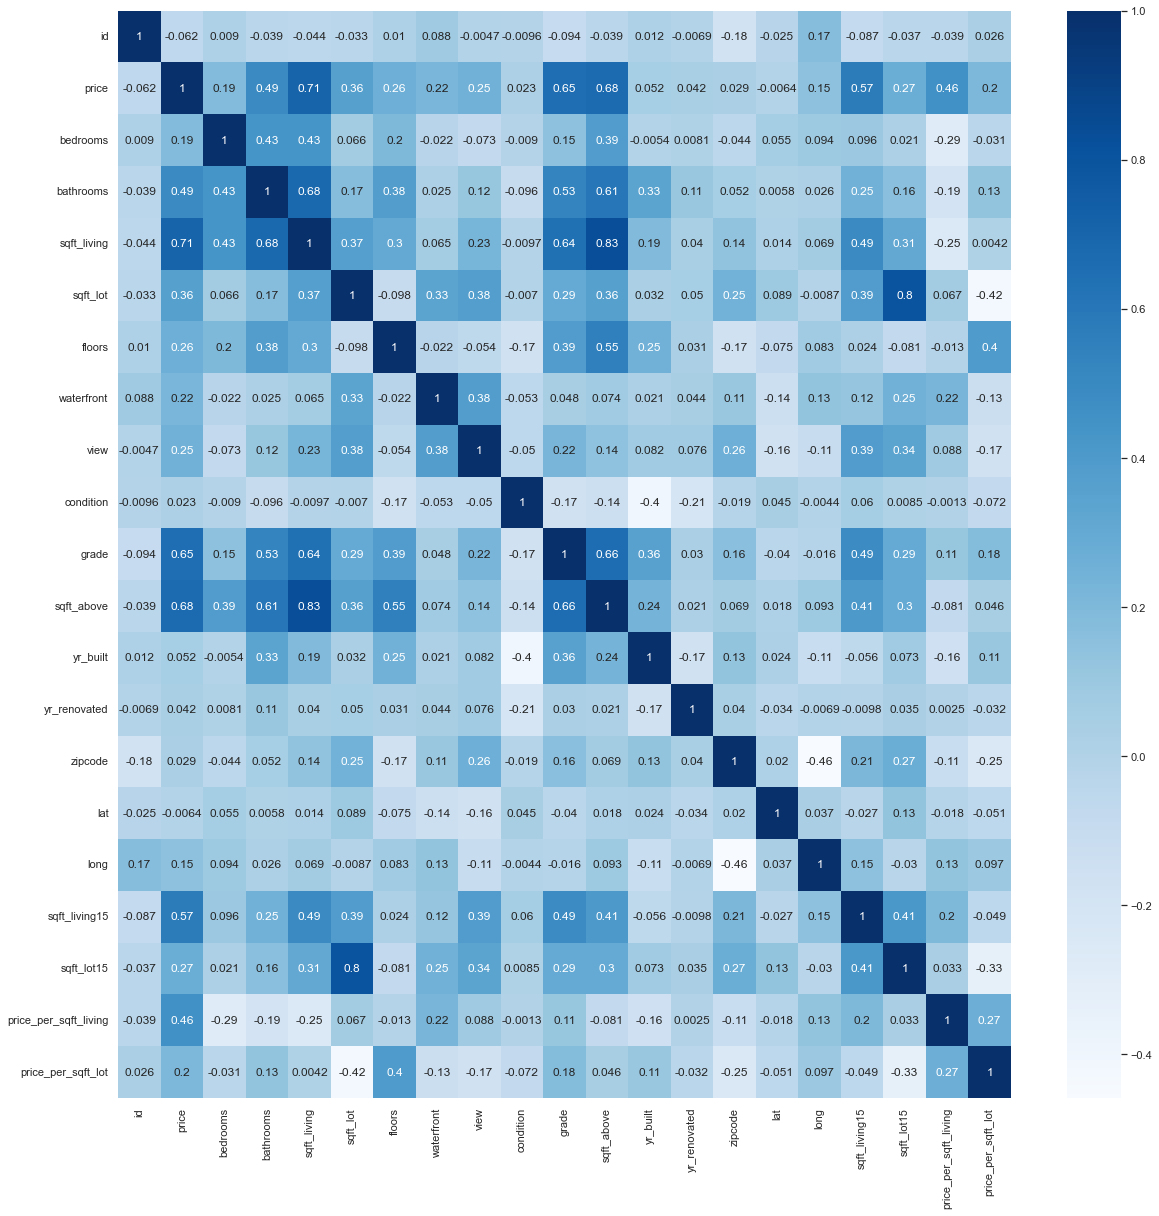

In [222]:
# gaining a very first impression of several correlations was done by method of a heatmap

plt.figure(figsize=(20,20))
sns.heatmap(dfce.corr(),cbar=True,annot=True,cmap='Blues')

2. cleaning the data

Filling NaN-values wherever needed: here it was important to fill the column 'yr_renovated', as this column will be needed often and contains several NaN-values.

In [223]:
# fill Nan wherever needed

# fill NaN in yr_renovated 
df['yr_renovated'] = df['yr_renovated'].fillna(0)


In [224]:
# calculate and add price per sqft_living

df['price_per_sqft_living'] = df['price'] / df['sqft_living']

# and per total lot size

df['price_per_sqft_lot'] = df['price'] / df['sqft_lot']

In [225]:
# convert date to datetime format

df.date = pd.to_datetime(df.date)

# add year_month, to get a better chronological overview

df['year_month'] = df['date'].dt.strftime('%Y-%m')
#df

The next step was to define the parameters set by the stakeholder and save them in variables for easy use and modification.<br/>

Firstly the 'center' of Seattle hat to be defined: going by a zipcode map, the following zipzones were seen as the city center:



In [226]:
# define the code, which lie in the city center: 

zipcenter = [98177, 98133, 98155, 98125, 98117, 98107, 98103, 98115, 98105, 98199,98109,98102,98112,98121,98101,98154,98104,
            98144,98118,98178,98116,98136,98126,98106,98134,98108,98146,98168]


The next step was to define what expensive houses means.<br/>

As expensive, the houses with a sale price above 80% of the houses was defined. 

In [227]:
dfc = df.query('zipcode in @zipcenter')
dfc.quantile(0.8)

id                      7611200117.200
price                       685000.000
bedrooms                         4.000
bathrooms                        2.500
sqft_living                   2340.000
sqft_lot                      8100.000
floors                           2.000
waterfront                       0.000
view                             0.000
condition                        4.000
grade                            8.000
sqft_above                    1780.000
yr_built                      1995.000
yr_renovated                     0.000
zipcode                      98146.000
lat                             47.703
long                          -122.292
sqft_living15                 2000.000
sqft_lot15                    7908.400
price_per_sqft_living          395.304
price_per_sqft_lot             194.054
Name: 0.8, dtype: float64

Knowing, that the 80th percentile for prices is 685000 Dollars, this parameter was stored in a variable and the dataframe was reduced accordingly

In [228]:
expensive = 685000
dfce = dfc.query("price > @expensive")
dfce

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,price_per_sqft_lot,year_month
32,461000390,2014-06-24,687500.000,4,1.750,2330,5000,1.500,0.000,0.000,...,1929,0.000,98117,47.682,-122.368,1460,5000,295.064,137.500,2014-06
35,9547205180,2014-06-13,696000.000,3,2.500,2300,3060,1.500,0.000,0.000,...,1930,2002.000,98115,47.683,-122.310,1590,3264,302.609,227.451,2014-06
54,4217401195,2015-03-03,920000.000,5,2.250,2730,6000,1.500,0.000,0.000,...,1927,0.000,98105,47.657,-122.281,2730,6000,336.996,153.333,2015-03
55,9822700295,2014-05-12,885000.000,4,2.500,2830,5000,2.000,NaN,0.000,...,1995,0.000,98105,47.660,-122.290,1950,5000,312.721,177.000,2014-05
91,5036300431,2015-03-11,1100000.000,5,2.750,3520,6353,2.000,0.000,0.000,...,2001,0.000,98199,47.651,-122.391,2520,6250,312.500,173.147,2015-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,9468200109,2014-06-17,1560000.000,3,3.500,4360,6240,2.000,0.000,3.000,...,2008,0.000,98103,47.679,-122.354,1920,3910,357.798,250.000,2014-06
21526,3874900085,2015-02-27,715000.000,4,3.250,2630,7770,2.000,0.000,0.000,...,2014,0.000,98126,47.546,-122.377,1370,7770,271.863,92.021,2015-02
21550,3528900770,2015-04-23,710200.000,4,3.000,1670,2642,2.000,NaN,0.000,...,2008,0.000,98109,47.640,-122.345,1670,2594,425.269,268.812,2015-04
21551,9521100031,2014-06-18,690000.000,3,3.250,1540,1428,3.000,0.000,0.000,...,2013,0.000,98103,47.665,-122.353,1660,3300,448.052,483.193,2014-06


Next I wanted to get a geographical overview, of where these expensive houses are located within Seattle

In [ ]:
locations = px.density_mapbox(dfce, lat="lat", lon = "long", mapbox_style ="stamen-terrain", radius = 8, zoom = 10,  width = 1000, height=600)#, color = "price_per_sqft_living")
locations.show()


In [229]:
dfce_month_mean = dfce.groupby(['year_month']).mean().reset_index()
#dfce_month_mean

[Text(0.5, 0, 'Month of sale'),
 Text(0, 0.5, 'Saleprice in Millions'),
 Text(0.5, 1.0, 'Average saleprice per month')]

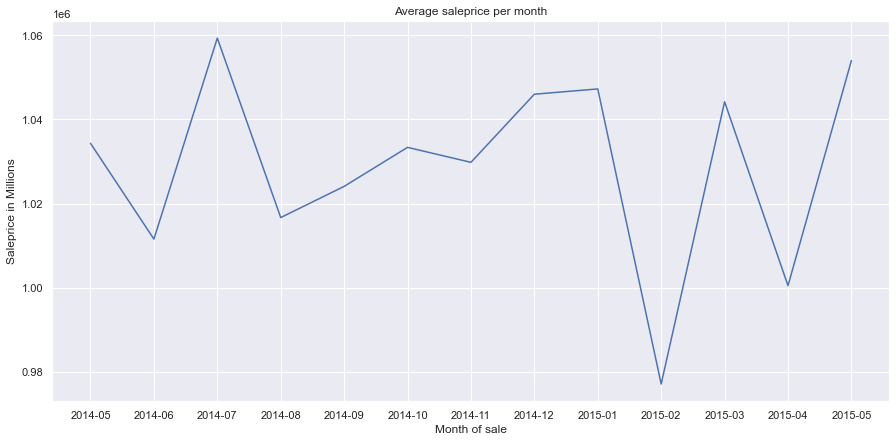

In [230]:
sns.set(rc={'figure.figsize':(15,7)})
plot1 = sns.lineplot(x='year_month', y='price', data=dfce_month_mean)
plot1.set(xlabel = 'Month of sale', ylabel= 'Saleprice in Millions', title='Average saleprice per month')

# medium prices of expensive houses were the highest in december. This might be a good time to sell a house!

<AxesSubplot:xlabel='date', ylabel='price'>

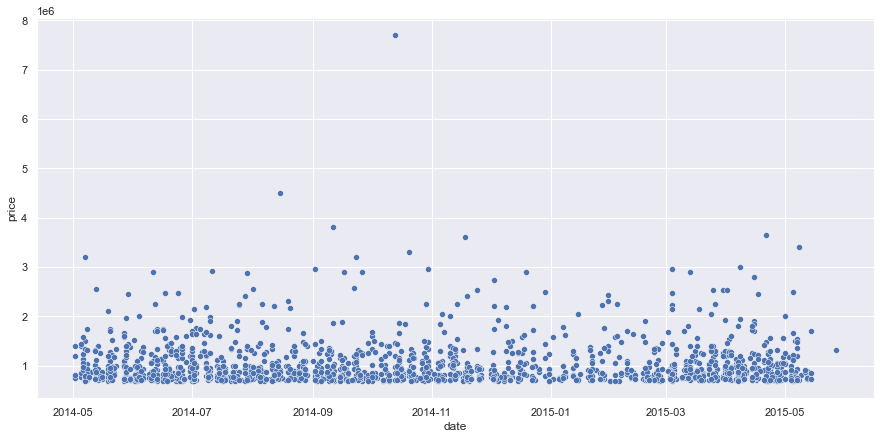

In [231]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x='date', y='price', data=dfce)

In [232]:
# checking why december might be so high

#dfce_dec14 = dfce[(dfce['year_month'] == "2014-12")]
#dfce_dec14.describe()


[Text(0.5, 0, 'Month of sale'),
 Text(0, 0.5, 'Price per square foot'),
 Text(0.5, 1.0, 'Average square foot price per month')]

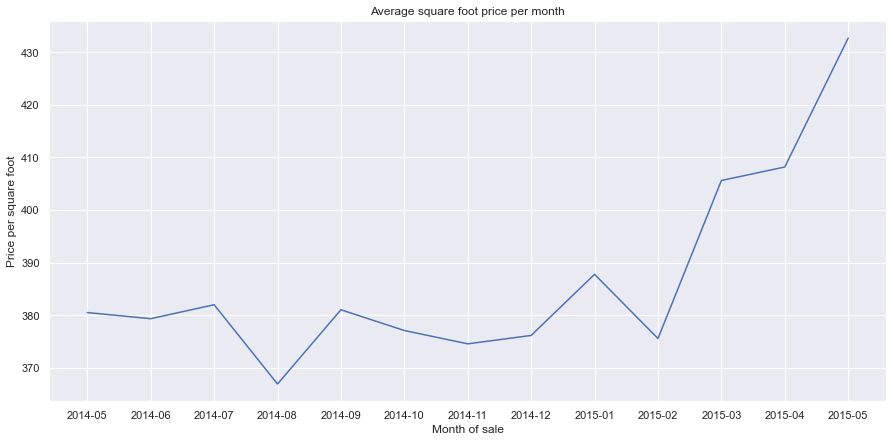

In [233]:

plot2 = sns.lineplot(x='year_month', y='price_per_sqft_living', data=dfce_month_mean)
plot2.set(xlabel = 'Month of sale', ylabel= 'Price per square foot', title='Average square foot price per month')


# sqft_living prizes of expensive houses are on an all-time high!

[Text(0.5, 0, 'Date of sale'),
 Text(0, 0.5, 'Price per sqft living'),
 Text(0.5, 1.0, 'Scatterplot of sqft prices')]

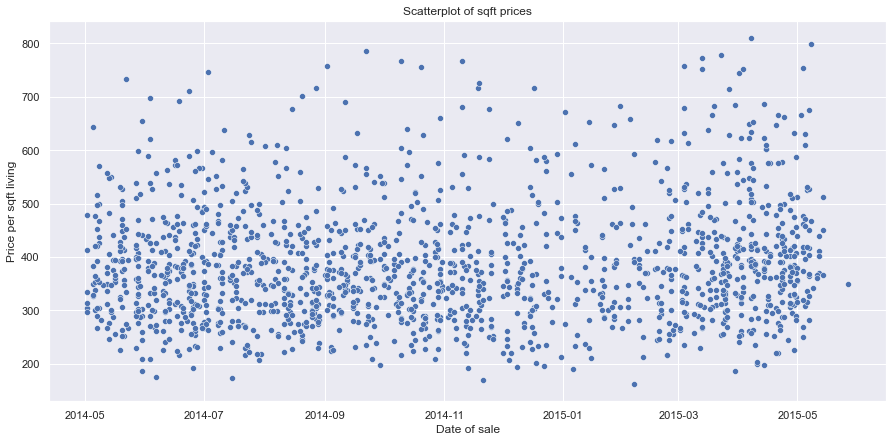

In [234]:
plot = sns.scatterplot(x='date', y='price_per_sqft_living', data=dfce)
plot.set(xlabel='Date of sale', ylabel='Price per sqft living', title='Scatterplot of sqft prices')

<AxesSubplot:xlabel='year_month', ylabel='price_per_sqft_lot'>

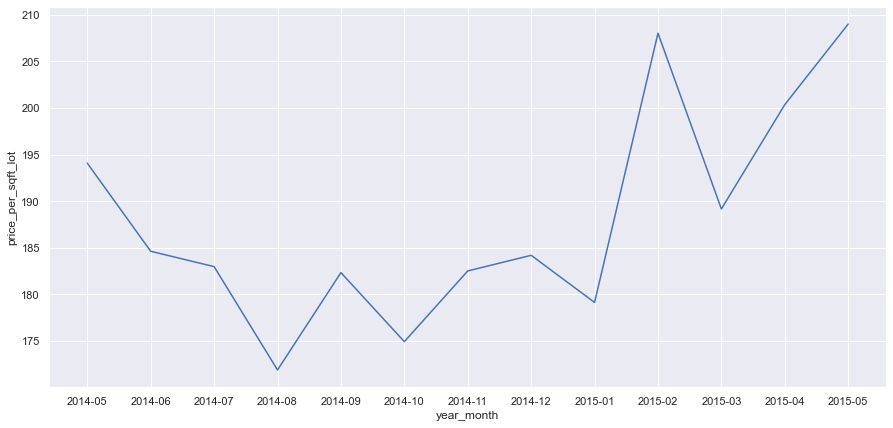

In [235]:

sns.lineplot(x='year_month', y='price_per_sqft_lot', data=dfce_month_mean)

# not knowing enough about the houses that he wants to sell, if they have big gardens or not
# prices still seem quiet high right now 


Looking if renovation changes the price

In [236]:
conditions = [
    (dfce['yr_renovated'] < dfce['yr_built']),
    (dfce['yr_renovated'] > dfce['yr_built'])
    ]
 
values = ['reno_no', 'reno_yes']

dfce['reno_yes_no'] = np.select(conditions, values)
dfce

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,price_per_sqft_lot,year_month,reno_yes_no
32,461000390,2014-06-24,687500.000,4,1.750,2330,5000,1.500,0.000,0.000,...,0.000,98117,47.682,-122.368,1460,5000,295.064,137.500,2014-06,reno_no
35,9547205180,2014-06-13,696000.000,3,2.500,2300,3060,1.500,0.000,0.000,...,2002.000,98115,47.683,-122.310,1590,3264,302.609,227.451,2014-06,reno_yes
54,4217401195,2015-03-03,920000.000,5,2.250,2730,6000,1.500,0.000,0.000,...,0.000,98105,47.657,-122.281,2730,6000,336.996,153.333,2015-03,reno_no
55,9822700295,2014-05-12,885000.000,4,2.500,2830,5000,2.000,NaN,0.000,...,0.000,98105,47.660,-122.290,1950,5000,312.721,177.000,2014-05,reno_no
91,5036300431,2015-03-11,1100000.000,5,2.750,3520,6353,2.000,0.000,0.000,...,0.000,98199,47.651,-122.391,2520,6250,312.500,173.147,2015-03,reno_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,9468200109,2014-06-17,1560000.000,3,3.500,4360,6240,2.000,0.000,3.000,...,0.000,98103,47.679,-122.354,1920,3910,357.798,250.000,2014-06,reno_no
21526,3874900085,2015-02-27,715000.000,4,3.250,2630,7770,2.000,0.000,0.000,...,0.000,98126,47.546,-122.377,1370,7770,271.863,92.021,2015-02,reno_no
21550,3528900770,2015-04-23,710200.000,4,3.000,1670,2642,2.000,NaN,0.000,...,0.000,98109,47.640,-122.345,1670,2594,425.269,268.812,2015-04,reno_no
21551,9521100031,2014-06-18,690000.000,3,3.250,1540,1428,3.000,0.000,0.000,...,0.000,98103,47.665,-122.353,1660,3300,448.052,483.193,2014-06,reno_no


In [237]:
# mean price of house if renovated, vss not renovated
# should take prize_per_sqft_living, as renovating the livingspace is more important than the lot... ?
# renovation should only count for the last x years!

date_of_renovation = 2010

# 3 graphs: no renovation, renovation before 2005, renovation after 2005

conditions = [
    (dfce['yr_renovated'] < dfce['yr_built']),
    (dfce['yr_renovated'] < date_of_renovation) & (dfce['yr_renovated'] > dfce['yr_built']),
    (dfce['yr_renovated'] >= date_of_renovation) & (dfce['yr_renovated'] > dfce['yr_built'])
    ]
 
values = ['no_reno', 'old_reno', 'very_recent_reno']

dfce['reno'] = np.select(conditions, values)

#dfce.info()
#dfce

# reno before
#dfce_ren_before = dfce[(dfce['yr_renovated'] < date_of_renovation) & (dfce['yr_renovated'] > dfce['yr_built'])]#.groupby(['year_month']).mean().reset_index()
#sns.set(rc={'figure.figsize':(30,10)})
#sns.lineplot(x='year_month', y='price_per_sqft_lot', data=dfce_ren_before)

In [238]:

# reno after

#dfce_ren_after = dfce[(dfce['yr_renovated'] > date_of_renovation) & (dfce['yr_renovated'] > dfce['yr_built'])]#.groupby(['year_month']).mean().reset_index()
#sns.set(rc={'figure.figsize':(30,10)})
#sns.lineplot(x='year_month', y='price_per_sqft_lot', data=dfce_ren_after)

In [239]:
#dfce_ren_false = dfce[(dfce['yr_renovated'] < dfce['yr_built'])].mean()#.groupby(['year_month']).mean().reset_index()
#sns.set(rc={'figure.figsize':(30,10)})
#sns.lineplot(x='year_month', y='price_per_sqft_lot', data=dfce_ren_false)
#dfce_ren_false

[Text(0, 0, 'Not renovated'),
 Text(1, 0, 'Renovated before 2010'),
 Text(2, 0, 'Renovated after 2010')]

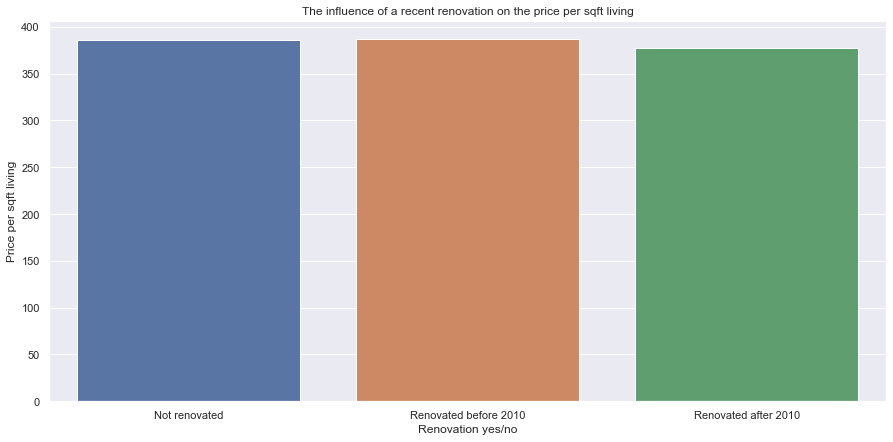

In [240]:
dfce_reno_mean = dfce.groupby(['reno']).mean().reset_index()
dfce_reno_mean
reno_labels = ['Not renovated', 'Renovated before 2010', 'Renovated after 2010']
plot = sns.barplot(x='reno', y='price_per_sqft_living', data=dfce_reno_mean)
plot.set(xlabel='Renovation yes/no', ylabel='Price per sqft living', title='The influence of a recent renovation on the price per sqft living')
plot.set_xticklabels(reno_labels)
# price_per_sqft if renovated

In [241]:
#df168 = df.query('zipcode == 98168')
#df168.describe()

Renovation isn't worth it!

Has to be checked with multiple yr_built input!

<AxesSubplot:xlabel='zipcode', ylabel='price_per_sqft_living'>

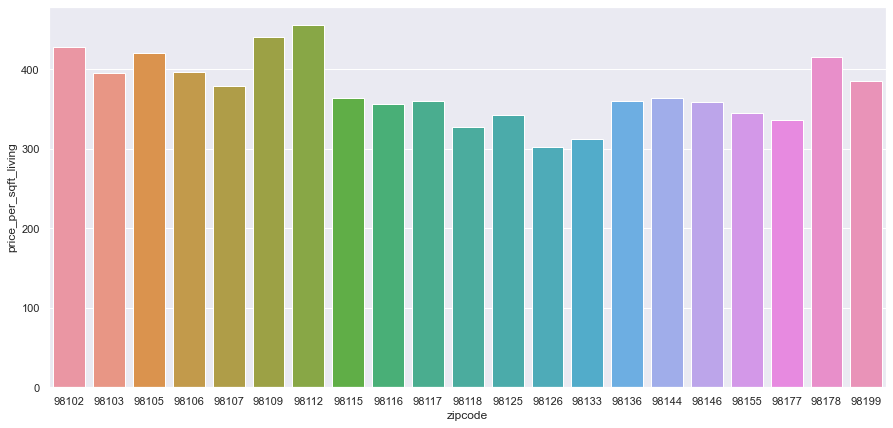

In [242]:
dfce_zip_mean = dfce.groupby(['zipcode']).mean().reset_index()
sns.barplot(x='zipcode', y='price_per_sqft_living', data=dfce_zip_mean)

[Text(0, 0, '98001'),
 Text(1, 0, '98002'),
 Text(2, 0, '98003'),
 Text(3, 0, '98004'),
 Text(4, 0, '98005'),
 Text(5, 0, '98006'),
 Text(6, 0, '98007'),
 Text(7, 0, '98008'),
 Text(8, 0, '98010'),
 Text(9, 0, '98011'),
 Text(10, 0, '98014'),
 Text(11, 0, '98019'),
 Text(12, 0, '98022'),
 Text(13, 0, '98023'),
 Text(14, 0, '98024'),
 Text(15, 0, '98027'),
 Text(16, 0, '98028'),
 Text(17, 0, '98029'),
 Text(18, 0, '98030'),
 Text(19, 0, '98031'),
 Text(20, 0, '98032'),
 Text(21, 0, '98033'),
 Text(22, 0, '98034'),
 Text(23, 0, '98038'),
 Text(24, 0, '98039'),
 Text(25, 0, '98040'),
 Text(26, 0, '98042'),
 Text(27, 0, '98045'),
 Text(28, 0, '98052'),
 Text(29, 0, '98053'),
 Text(30, 0, '98055'),
 Text(31, 0, '98056'),
 Text(32, 0, '98058'),
 Text(33, 0, '98059'),
 Text(34, 0, '98065'),
 Text(35, 0, '98070'),
 Text(36, 0, '98072'),
 Text(37, 0, '98074'),
 Text(38, 0, '98075'),
 Text(39, 0, '98077'),
 Text(40, 0, '98092'),
 Text(41, 0, '98102'),
 Text(42, 0, '98103'),
 Text(43, 0, '98105')

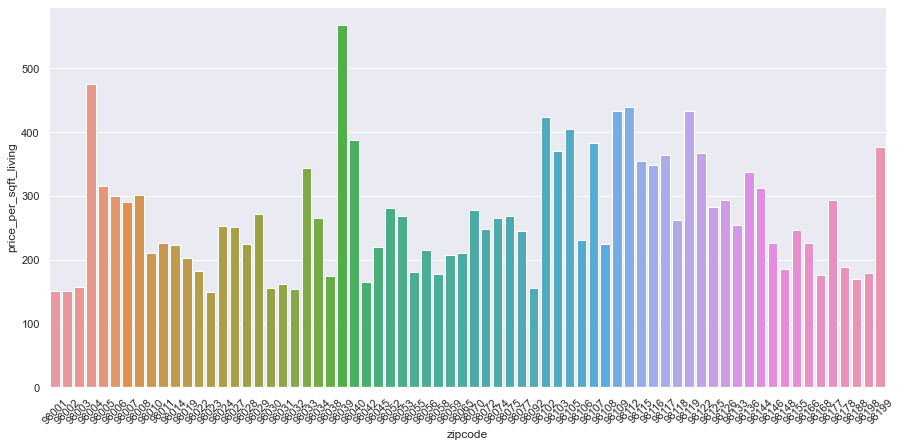

In [243]:
df_zip_mean = df.groupby(['zipcode']).mean().reset_index()
ax = sns.barplot(x='zipcode', y='price_per_sqft_living', data=df_zip_mean)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

Text(0, 0.5, 'Price')

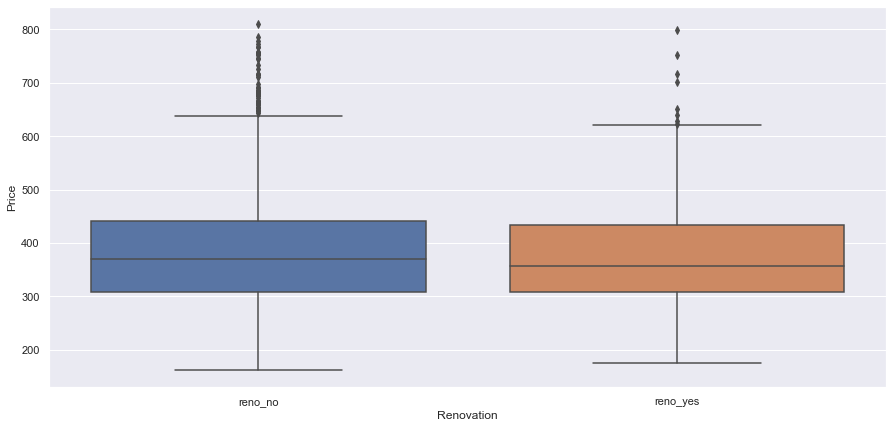

In [244]:
sns.boxplot(x='reno_yes_no',y='price_per_sqft_living',data=dfce)
plt.xlabel('Renovation')
plt.ylabel('Price')

In [245]:
#dfce_month_mean

In [246]:
#fig, ax = plt.subplots(3, 7)
#for i, code in enumerate(zipcenter):
#    zip_plot = dfce.query(f"zipcode == {code}")
#    ax = sns.lineplot(x='year_month', y='price_per_sqft_living', data=zip_plot)


<AxesSubplot:xlabel='yr_renovated', ylabel='price_per_sqft_living'>

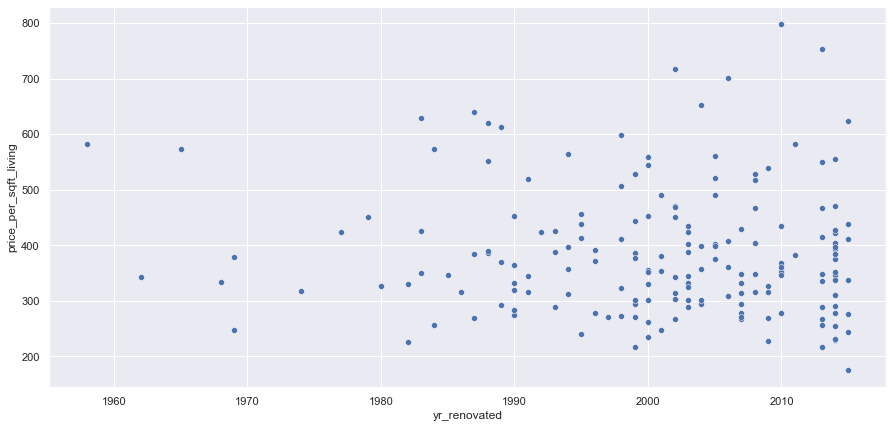

In [247]:
dfce_renovated = dfce.query('yr_renovated > yr_built')
sns.scatterplot(x='yr_renovated', y='price_per_sqft_living', data=dfce_renovated)

#scatterplot of the prices of renovated houses correlating to renovation year

<AxesSubplot:xlabel='yr_built', ylabel='price_per_sqft_living'>

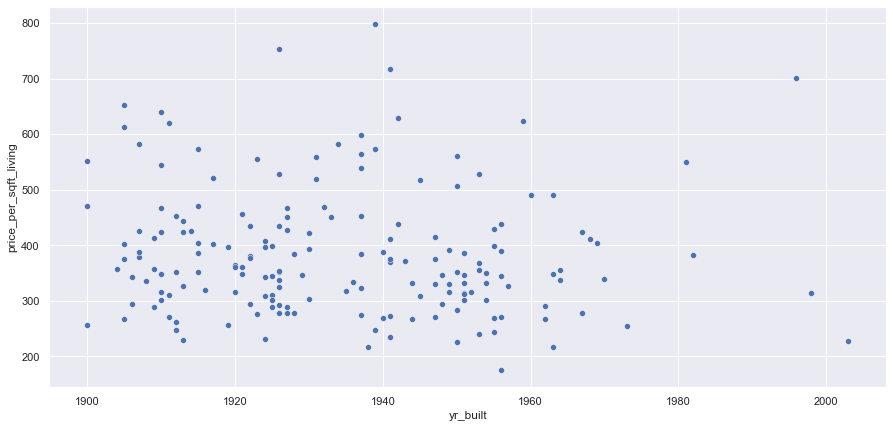

In [248]:
dfce_renovated = dfce.query('yr_renovated > yr_built')
sns.scatterplot(x='yr_built', y='price_per_sqft_living', data=dfce_renovated)

#scatterplot of the prices of renovated houses correlating to construction year

<AxesSubplot:xlabel='yr_built', ylabel='price_per_sqft_living'>

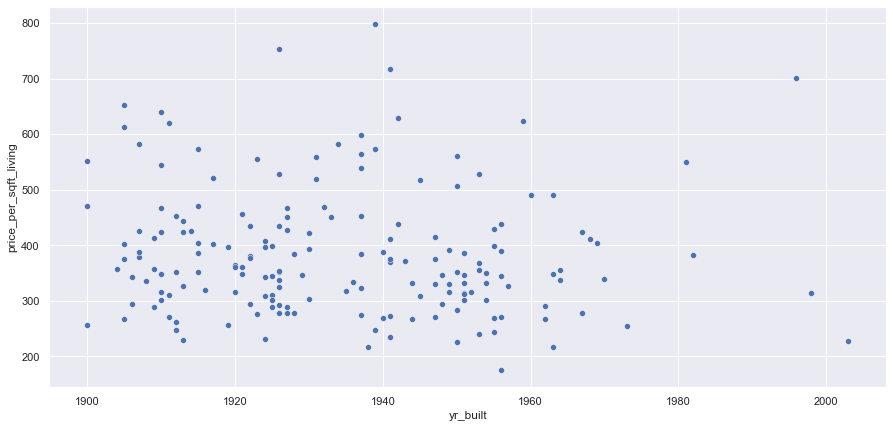

In [249]:
dfce_not_renovated = dfce.query('yr_renovated < yr_built')
sns.scatterplot(x='yr_built', y='price_per_sqft_living', data=dfce_renovated)

#scatterplot of the prices of non renovated houses correlating to construction year

[Text(0, 0, 'Renovated'), Text(1, 0, 'Not renovated')]

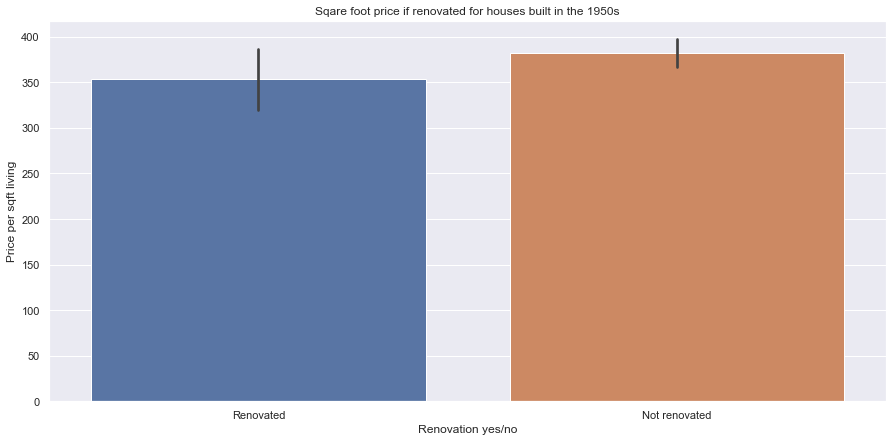

In [250]:
dfce_50 = dfce.query('1950 <= yr_built < 1960')
group_labels = ['Renovated', 'Not renovated']
plot = sns.barplot(x='reno_yes_no', y='price_per_sqft_living', data=dfce_50)
plot.set(xlabel='Renovation yes/no', ylabel='Price per sqft living', title='Sqare foot price if renovated for houses built in the 1950s')
plot.set_xticklabels(group_labels)

<AxesSubplot:xlabel='grade', ylabel='price_per_sqft_living'>

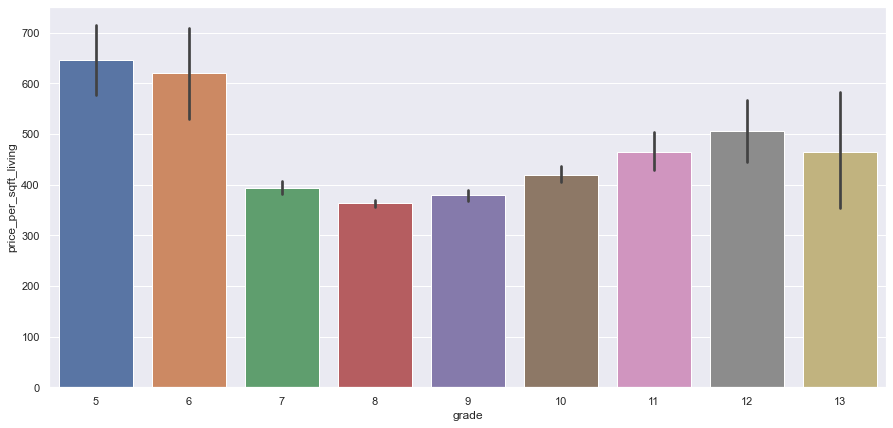

In [251]:
# grade-price correlation

sns.barplot(x='grade', y='price_per_sqft_living', data=dfce)

[Text(0.5, 0, 'Condition'),
 Text(0, 0.5, 'Price per square foot'),
 Text(0.5, 1.0, 'Average square foot price per condition')]

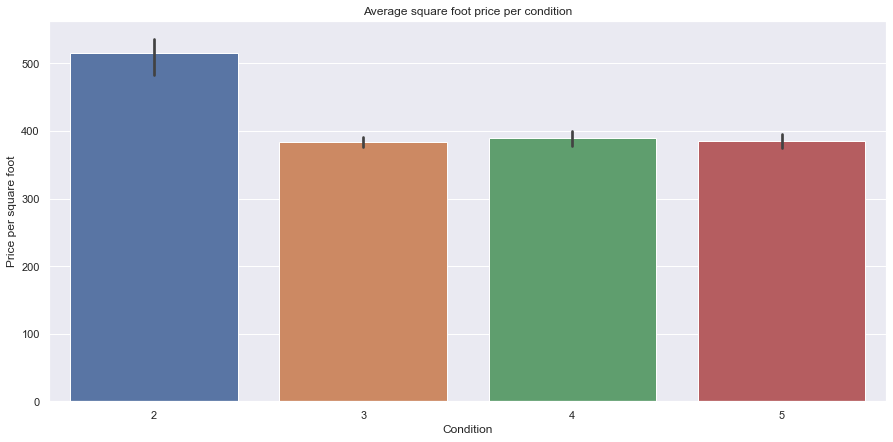

In [252]:
# condition - price correlation

plot4 = sns.barplot(x='condition', y='price_per_sqft_living', data=dfce)
plot4.set(xlabel = 'Condition', ylabel= 'Price per square foot', title='Average square foot price per condition')


<AxesSubplot:xlabel='year_month', ylabel='Count'>

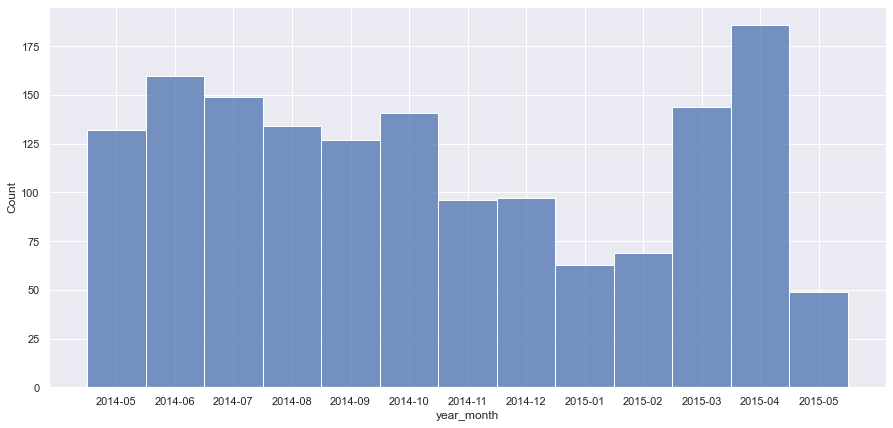

In [253]:
sns.histplot(dfce.year_month.sort_values())

# number of sales per month

<AxesSubplot:xlabel='date', ylabel='price_per_sqft_living'>

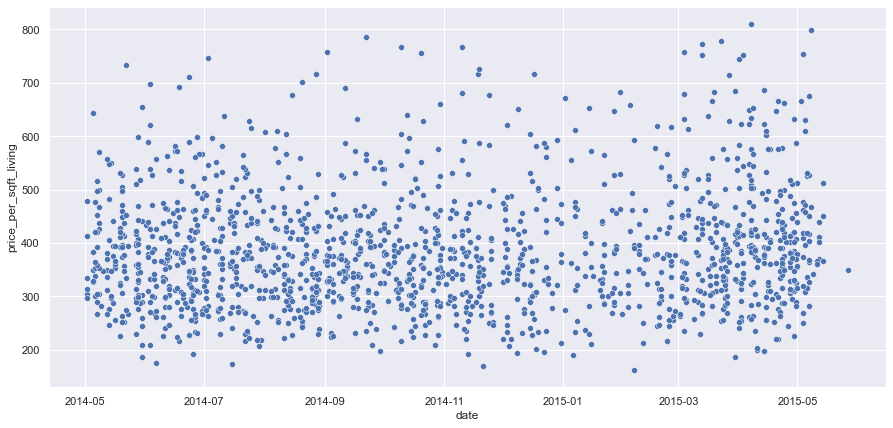

In [254]:

sns.scatterplot(x='date', y='price_per_sqft_living', data=dfce)

# scatter of prices per sqft per date

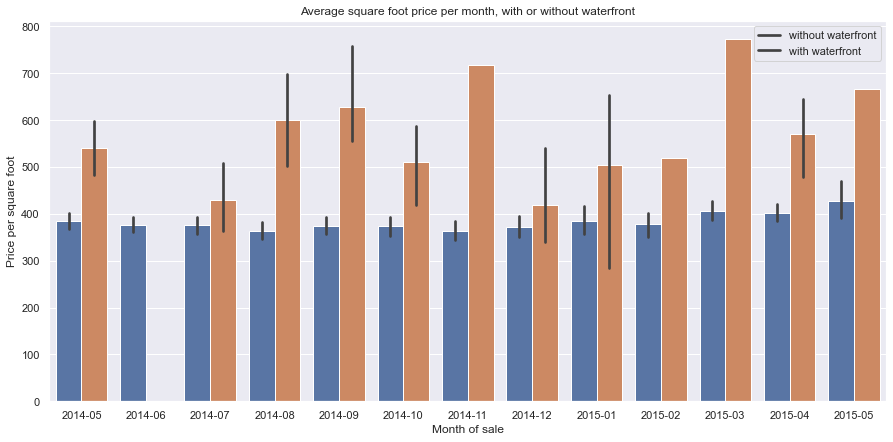

In [255]:
dfces = dfce.sort_values(['year_month'])
plot3 = sns.barplot(x='year_month', y='price_per_sqft_living', hue='waterfront', data=dfces)
plot3.set(xlabel = 'Month of sale', ylabel= 'Price per square foot', title='Average square foot price per month, with or without waterfront')
plt.legend(labels=['without waterfront', 'with waterfront'])


In [256]:
dfce_june_waterfront = dfce.query('waterfront == 1').query('year_month == "2015-04"')
dfce_june_waterfront

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,price_per_sqft_lot,year_month,reno_yes_no,reno
1418,8073000550,2015-04-15,1700000.000,4,3.750,3190,17186,2.000,1.000,4.000,...,98178,47.511,-122.246,2290,13496,532.915,98.918,2015-04,reno_no,no_reno
4404,5154200015,2015-04-14,1710000.000,3,3.000,2490,27702,2.000,1.000,4.000,...,98116,47.560,-122.403,2580,12119,686.747,61.728,2015-04,reno_no,no_reno
5744,6744701310,2015-04-15,1850000.000,4,2.500,3830,11972,1.000,1.000,4.000,...,98155,47.740,-122.284,3080,12297,483.029,154.527,2015-04,reno_no,no_reno
6502,4217402115,2015-04-21,3650000.000,6,4.750,5480,19401,1.500,1.000,4.000,...,98105,47.651,-122.277,3510,15810,666.058,188.135,2015-04,reno_no,no_reno
8217,7129303045,2015-04-17,949950.000,5,2.500,2340,1989,2.000,1.000,4.000,...,98118,47.519,-122.257,2200,3230,405.962,477.602,2015-04,reno_no,no_reno
19584,284000025,2015-04-20,1410000.000,2,2.000,2180,18525,1.000,1.000,4.000,...,98146,47.504,-122.387,2480,21503,646.789,76.113,2015-04,reno_no,no_reno


In [257]:
locations = px.scatter_mapbox(dfce, lat="lat", lon = "long", mapbox_style ="stamen-terrain", zoom = 10,  width = 1000, height=600, color = "price_per_sqft_living")
locations.show()
    

In [259]:
dfc_e_sqft = dfc.query('price_per_sqft_living > 395.304')

locations = px.scatter_mapbox(dfc_e_sqft, lat="lat", lon = "long", mapbox_style ="stamen-terrain", zoom = 10,  width = 1000, height=600, color = "price_per_sqft_living")
locations.show()



<AxesSubplot:xlabel='yr_built', ylabel='price_per_sqft_living'>

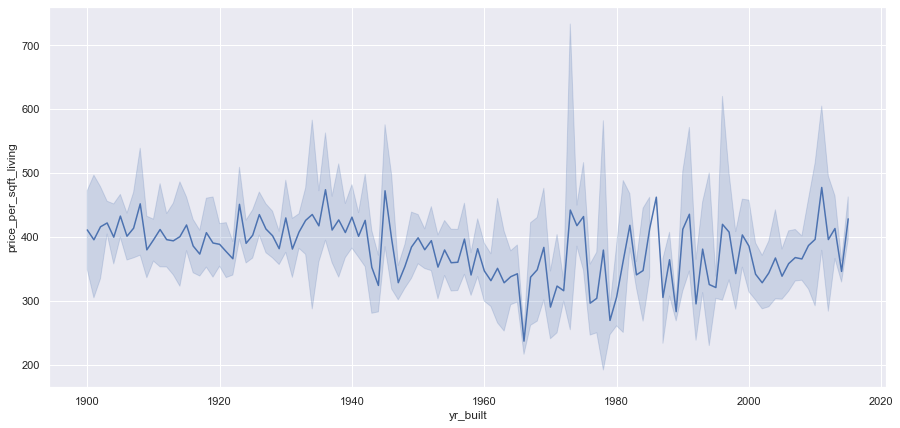

In [260]:
sns.lineplot(data=dfce, x='yr_built', y='price_per_sqft_living')

[Text(0.5, 0, 'Decade of construction'),
 Text(0, 0.5, 'Price per sqft living'),
 Text(0.5, 1.0, 'Avg Price per construction year if renovated or not')]

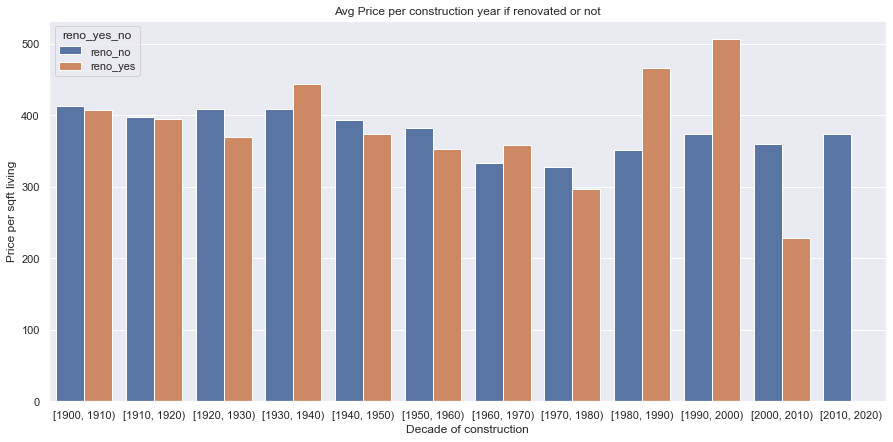

In [261]:
conditions = [
    (dfce['yr_renovated'] < dfce['yr_built']),
    (dfce['yr_renovated'] > dfce['yr_built'])
    ]
 
values = ['reno_no', 'reno_yes']

dfce['reno_yes_no'] = np.select(conditions, values)

dfce_decades = dfce
period_length = 10
start_year = 1900
end_year = 2016
dfce_decades = dfce_decades[(dfce_decades['yr_built'] >= 1900)]
decades = np.arange(start_year, end_year, period_length).tolist()
tuples = [(start, start+period_length) for start in decades]
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')
dfce_decades['decade'] = pd.cut(dfce_decades['yr_built'], bins=bins, include_lowest=True, precision=0)
dfce_decades
dfce_decades = dfce_decades.groupby(['decade', 'reno_yes_no']).mean().reset_index().drop('yr_built', axis=1)


#group_labels = ['Renovated', 'Not renovated']
#plot = sns.barplot(x='reno_yes_no', y='price_per_sqft_living', data=dfce)
#plot.set(xlabel='Renovation yes/no', ylabel='Price per sqft living', title='Sqare foot price if renovated for houses built in the 1950s')
#plot.set_xticklabels(group_labels)
plabels = ['not renovated', 'renovated']
plot = sns.barplot(x='decade', y='price_per_sqft_living', hue='reno_yes_no', data=dfce_decades)
plot.set(xlabel='Decade of construction', ylabel='Price per sqft living', title='Avg Price per construction year if renovated or not')
#plt.legend(labels=['renovated', 'not renovated'])